# **1. RANSAC [30 Pts]**

##1.1 Fitting a line [30 Pts]

##1.2 Fitting Transformations [20 Pts]

3. np.load()

In [ ]:
def linear_fit(x, y):
    """For set of points `(xi, yi)`, return linear polynomial `f(x) = k*x + m` that
    minimizes the sum of quadratic errors.
    """
    meanx = sum(x) / len(x)
    meany = sum(y) / len(y)
    k = sum((xi-meanx)*(yi-meany) for xi,yi in zip(x,y)) / sum((xi-meanx)**2 for xi in x)
    m = meany - k*meanx
    return k, m

In [2]:
import numpy as np
b = np.load('/content/sample_data/transform.npy')
x=[]
y=[]
for i in range(len(b)):
  for j in range(4):
    if j%2==0:
      x.append(b[i][j])
    else:
      y.append(b[i][j])
print(x)
print(len(x))
print(y)

[-4.551984708381827, -10.013448417738116, 0.932568760878989, -1.9437161106980183, 0.9843073203157289, -4.675813176947818, -1.2744874751921733, -2.5875166181579985, 3.460423608953578, 10.658835886648426, 0.5146073152496982, 1.6160356136457648, -2.610291069654076, -3.885738874435188, -0.6454002857012213, -0.3369917381400922, 4.57338297939075, 6.648741174315358, -2.2815443704984095, -7.790630086703068, 2.5799837516962807, -2.1332685839217462, -1.5511326320786658, -9.316723194597554, -4.679586622011787, -14.431109047742863, 2.4406810181343674, 5.854579849248584, -1.247608522881408, 1.2289197143248922, 3.115630374289527, 2.8791189252583465, 2.5489510080875064, 0.9372093837362809, -3.517555474087455, -6.592958748639211, 4.484557358448903, 10.467146662321024, -0.5985366144835034, -1.0776044027610443, -2.485000541646656, -8.999731568149889, 2.6854934311580037, 4.855705975166251, 4.8171337295540155, 3.7116022299116453, 0.04330787075517062, 1.9500233867567485, 4.193669628045026, 9.02423257831762

In [ ]:
k,m=linear_fit(x,y)
print(k,m)

-1.1008702599256277 -2.64702783972154


4. Plot points

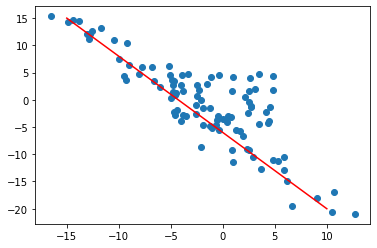

In [ ]:
#Least sqaure fit 2D
import matplotlib.pyplot as plt
plt.scatter(x,y)
#plt.plot(x)
plt.plot([-15,10],[15,-20],'r-')
plt.show()


6. Homography transformation

In [20]:
import numpy as np
b = np.load('/content/sample_data/points_case_7.npy')
x=[]
y=[]
for i in range(len(b)):
  for j in range(4):
    if j%2==0:
      x.append(b[i][j])
    else:
      y.append(b[i][j])
print(x)
print(y)

[0, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 7, 3, 7, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 4, 7, 4, 7, 4, 6, 4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 5, 8, 5, 8, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6, 9, 6, 8, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 10, 7, 9, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 5, 7, 5, 8,

In [21]:
import numpy as np

x_1 = [0, 4]
y_1 = [2, 5]
x_2 = [1, 5]
y_2 = [2, 5]
x_3 = [1, 5]
y_3 = [3, 6]
x_4 = [1, 5]
y_4 = [4, 7]
x_5 = [1, 5]
y_5 = [5, 8]
#P = np.zeros((8,9))
P = np.array([
    [-x_1[0], -y_1[0], -1, 0, 0, 0, x_1[0]*x_1[1], y_1[0]*x_1[1], x_1[1]],
    [0, 0, 0, -x_1[0], -y_1[0], -1, x_1[0]*y_1[1], y_1[0]*y_1[1], y_1[1]],
    [-x_2[0], -y_2[0], -1, 0, 0, 0, x_2[0]*x_2[1], y_2[0]*x_2[1], x_2[1]],
    [0, 0, 0, -x_2[0], -y_2[0], -1, x_2[0]*y_2[1], y_2[0]*y_2[1], y_2[1]],
    [-x_3[0], -y_3[0], -1, 0, 0, 0, x_3[0]*x_3[1], y_3[0]*x_3[1], x_3[1]],
    [0, 0, 0, -x_3[0], -y_3[0], -1, x_3[0]*y_3[1], y_3[0]*y_3[1], y_3[1]],
    [-x_4[0], -y_4[0], -1, 0, 0, 0, x_4[0]*x_4[1], y_4[0]*x_4[1], x_4[1]],
    [0, 0, 0, -x_4[0], -y_4[0], -1, x_4[0]*y_4[1], y_4[0]*y_4[1], y_4[1]],
    [-x_5[0], -y_5[0], -1, 0, 0, 0, x_5[0]*x_5[1], y_5[0]*x_5[1], x_5[1]],
    [0, 0, 0, -x_5[0], -y_5[0], -1, x_5[0]*y_5[1], y_5[0]*y_5[1], y_5[1]],
    ])

[U, S, Vt] = np.linalg.svd(P)
homography = Vt[-1].reshape(3, 3)
print(homography)
#transformedPoint = homography @ np.array([1679,  128, 1]).transpose()
#print(transformedPoint/transformedPoint[-1]) # will be ~[4, 7, 1]

[[ 4.94008727e-01 -8.04693021e-17 -3.64789935e-01]
 [ 5.85206210e-01  2.58437584e-02 -5.07674935e-01]
 [ 1.17041242e-01 -3.10320242e-17 -9.11974837e-02]]


# **2. Image Stitching [55 Pts]**

 1. Load both images: p2/uttower left.jpg and p2/uttower right.jpg. Convert
them to double and to grayscale. Display the grayscale images.

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

def im2double(im):
    info = np.iinfo(im.dtype) # Get the data type of the input image
    return im.astype(np.float) / info.max

img = cv2.imread('/content/sample_data/uttower_left.jpg') # Read in your image
out = im2double(img)
cv2_imshow(out)

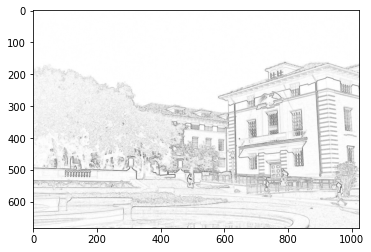

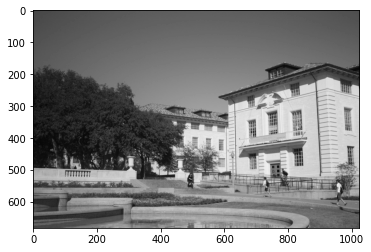

In [ ]:
#When performing mathematical transformations of images we often need the image to be of double type
###double type
from PIL import Image  
import matplotlib.pyplot as plt    
I = Image.open("/content/sample_data/uttower_right.jpg")
grayscale = I.convert('L')
a = np.asarray(grayscale,dtype=np.float64)
double = - np.sqrt(np.gradient(a)[0]**2+np.gradient(a)[1]**2)
plt.imshow(double,cmap='gray')
plt.show()
#double.save('/content/sample_data/double.png')
## grayscale
plt.imshow(grayscale,cmap='gray')
plt.show()
#img.save('/content/sample_data/grayscale.png')

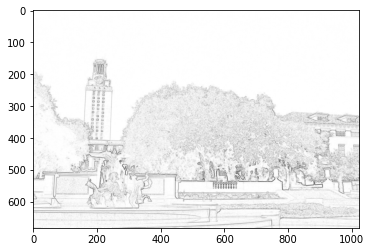

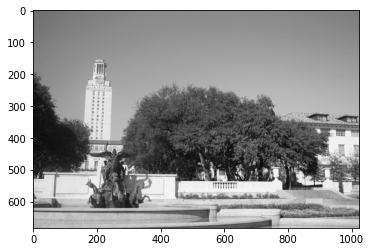

In [ ]:
#When performing mathematical transformations of images we often need the image to be of double type
###double type
from PIL import Image  
import matplotlib.pyplot as plt    
I = Image.open("/content/sample_data/uttower_left.jpg")
grayscale = I.convert('L')
a = np.asarray(grayscale,dtype=np.float64)
double = - np.sqrt(np.gradient(a)[0]**2+np.gradient(a)[1]**2)
plt.imshow(double,cmap='gray')
plt.show()
#double.imwrite('/content/sample_data/double.png')
## grayscale
plt.imshow(grayscale,cmap='gray')
plt.show()
#img.imwrite('/content/sample_data/grayscale.png')

2. Use SIFT/SURF descriptors in OpenCV to detect feature points in both images. Display both
the images along with the feature points.

In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python

!pip install opencv-contrib-python==4.5.1.48
!pip install opencv-python==4.5.1.48

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? Y
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? Y
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 56.3 MB 54 kB/s 


     |████████████████████████████████| 50.4 MB 17 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


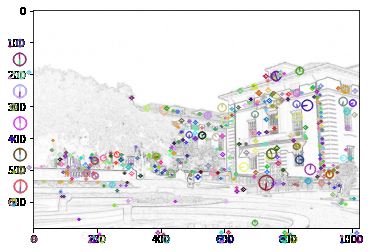

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Loading the image
img = cv2.imread('/content/sample_data/doubleright.png')
  
 # Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Applying SIFT detector
sift = cv2.SIFT_create() 
kp = sift.detect(gray, None)
  
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
cv2_imshow(img)

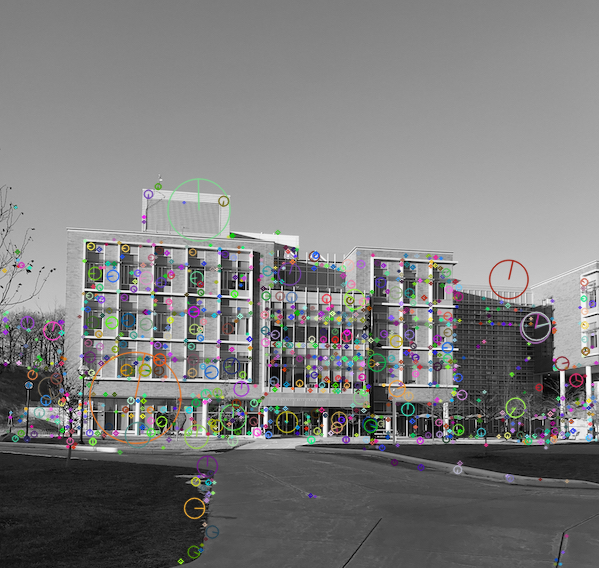

In [19]:
import cv2
from google.colab.patches import cv2_imshow
# Loading the image
img = cv2.imread('/content/sample_data/bbb_left.jpg')
  
 # Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Applying SIFT detector
sift = cv2.SIFT_create() 
kp = sift.detect(gray, None)
  
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
cv2_imshow(img)

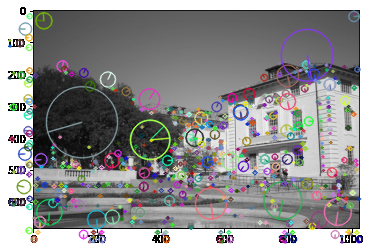

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Loading the image
img = cv2.imread('/content/sample_data/grayright.png')
  
 # Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
# Applying SIFT detector
sift = cv2.SIFT_create() 
kp = sift.detect(gray, None)
  
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
cv2_imshow(img)

3.Compute distances between every descriptor in one image and every descriptor in the other
image. Alternatively, experiment with computing normalized correlation, or Euclidean distance after
normalizing all descriptors to have zero mean and unit standard deviation. Report your choices.

key_point1 [<KeyPoint 0x7f9686380bd0>, <KeyPoint 0x7f9686380420>, <KeyPoint 0x7f9686380c60>, <KeyPoint 0x7f96863804b0>, <KeyPoint 0x7f96863805d0>, <KeyPoint 0x7f9686380270>, <KeyPoint 0x7f9686380960>, <KeyPoint 0x7f9686380180>, <KeyPoint 0x7f9686380540>, <KeyPoint 0x7f96863805a0>, <KeyPoint 0x7f9686380450>, <KeyPoint 0x7f9686380f60>, <KeyPoint 0x7f9686380750>, <KeyPoint 0x7f9686380120>, <KeyPoint 0x7f9686380e10>, <KeyPoint 0x7f9686380360>, <KeyPoint 0x7f9686380fc0>, <KeyPoint 0x7f9686380390>, <KeyPoint 0x7f9686380e40>, <KeyPoint 0x7f9686380780>, <KeyPoint 0x7f9686380030>, <KeyPoint 0x7f9686380570>, <KeyPoint 0x7f9686380f30>, <KeyPoint 0x7f9686380060>, <KeyPoint 0x7f9686380ed0>, <KeyPoint 0x7f96863800f0>, <KeyPoint 0x7f96863808d0>, <KeyPoint 0x7f9686380a50>, <KeyPoint 0x7f9686380c30>, <KeyPoint 0x7f9686380660>, <KeyPoint 0x7f9686380210>, <KeyPoint 0x7f96863804e0>, <KeyPoint 0x7f9686380d80>, <KeyPoint 0x7f9686380a20>, <KeyPoint 0x7f9686380b40>, <KeyPoint 0x7f96863807b0>, <KeyPoint 0x7f96

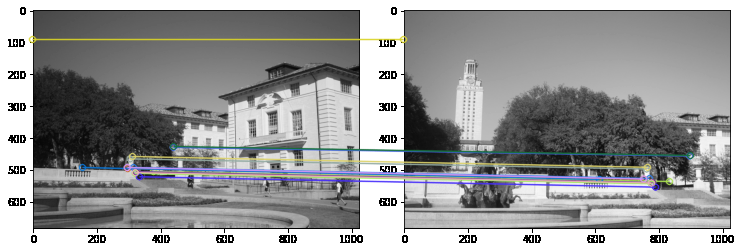

In [23]:
# importing openCV library
import cv2
from google.colab.patches import cv2_imshow

# function to read the images by taking there path
def read_image(path1,path2):
	read_img1 = cv2.imread(path1)
	read_img2 = cv2.imread(path2)
	return (read_img1,read_img2)

# function to convert images from RGB to gray scale
def convert_to_grayscale(pic1,pic2):
	gray_img1 = cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
	gray_img2 = cv2.cvtColor(pic2,cv2.COLOR_BGR2GRAY)
	return (gray_img1,gray_img2)

# function to detect the features by finding key points
# and descriptors from the image
def detector(image1,image2):
 detect = cv2.ORB_create()
 key_point1,descrip1 = detect.detectAndCompute(image1,None)
 key_point2,descrip2 = detect.detectAndCompute(image2,None)
 print('key_point1',key_point1)
 print('descrip1',descrip1)
 print('key_point2',key_point2)
 print('descrip2',descrip2)
 print(len(key_point1))
 print(len(descrip1[0]))
 print(len(key_point2))
 print(len(descrip2))
 return (key_point1,descrip1,key_point2,descrip2)

# function to find best detected features using
# brute force matcher and match them according to there humming distance
def BF_FeatureMatcher(des1,des2):
	brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
	no_of_matches = brute_force.match(des1,des2)

	# finding the humming distance of the matches and sorting them
	no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
	return no_of_matches

# function displaying the output image with the feature matching
def display_output(pic1,kpt1,pic2,kpt2,best_match):
	# drawing first fifteen best feature matches using drawMatches() function
	output_image = cv2.drawMatches(pic1,kpt1,pic2,
								kpt2,best_match[:15],None,flags=2)
	cv2_imshow(output_image)

# main function
if __name__ == '__main__':
	first_image_path = '/content/sample_data/grayright.png'
	second_image_path = '/content/sample_data/grayleft.png'

	# reading the image from there paths
	img1, img2 = read_image(first_image_path,second_image_path)

	# converting the readed images into the gray scale images
	gray_pic1, gray_pic2 = convert_to_grayscale(img1,img2)

	# storing the finded key points and descriptors of both of the images
	key_pt1,descrip1,key_pt2,descrip2 = detector(gray_pic1,gray_pic2)
	# sorting the number of best matches obtained from brute force matcher
	number_of_matches = BF_FeatureMatcher(descrip1,descrip2)

	# after drawing the feature matches displaying the output image
	display_output(gray_pic1,key_pt1,gray_pic2,key_pt2,number_of_matches)
	cv2.waitKey()
	cv2.destroyAllWindows()


5. RANSAC

In [ ]:
   
import numpy as np
import cv2 as cv
import random
import warnings
from google.colab.patches import cv2_imshow

def fxn():
    warnings.warn("Runtime", RuntimeWarning)


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


def RANSACAlgorithm(matches, kp1, kp2, numIterations, inlierThreshold, image1Display, image2Display, displayName, saveRansacMatches, ransacFilePath):
    kp_matches = get_key_point_matches(kp1, kp2, matches)
    return RANSAC(matches, kp1, kp2, kp_matches, numIterations, inlierThreshold, image1Display, image2Display, displayName, saveRansacMatches, ransacFilePath)


# Part 3 A.
def project(x1, y1, H):
    # Referenced Lecture Slides
    homogeneous_coordinates = np.array([x1, y1, 1])
    projective_transformation = H.dot(homogeneous_coordinates)
    w = projective_transformation[2]
    xp = projective_transformation[0]/w
    yp = projective_transformation[1]/w

    # a = np.array([[[x1, y1]]], dtype='float32')
    # hom_test = cv.perspectiveTransform(a, H)

    return xp, yp


# Part 3 B.
def compute_inlier_count(H, kp_matches, inlierThreshold):
    inlier_count = 0
    # Matches contains the pairs of key point coordinates
    # matches =  [ [[x1, y1],[x2, y2]], [[x3, y3], [x4, y4]], ... ]
    for match in kp_matches:
        distance = calculate_projected_distance(match, H)
        if distance < inlierThreshold:
            inlier_count = inlier_count + 1

    len(match)
    return inlier_count


# Calculate the projected distance of the first pair of points in a match to the second pair of points
def calculate_projected_distance(kp_match, H):
    x1 = kp_match[0].pt[0]
    y1 = kp_match[0].pt[1]

    x2 = kp_match[1].pt[0]
    y2 = kp_match[1].pt[1]

    xp, yp = project(x1, y1, H)
    distance = np.sqrt((xp - x2) ** 2 + (yp - y2) ** 2)
    return distance


def RANSAC(matches, kp1, kp2, kp_matches, numIterations, inlierThreshold, image1, image2, displayName, save_ransac_matches, ransacFilePath):
    # matches is an array containing pairs of matching coordinates:
    # i.e. matches =  [ [[x1, y1], [x2, y2]], [[x3, y3], [x4,y4]] ]

    maxInliers = 0
    highest_score_H = np.zeros((3, 3))

    for i in range(0, numIterations):
        # Randomly select 4 pairs of potentially matching points from matches
        inlier_src_pts = np.zeros((4, 2))
        inlier_dst_pts = np.zeros((4, 2))
        for j in range(4):
            randomInt = random.randint(0, len(kp_matches)-1)
            inlier_src_pts[j] = kp_matches[randomInt][0].pt
            inlier_dst_pts[j] = kp_matches[randomInt][1].pt

        # Compute homography for these 4 points
        H, status = cv.findHomography(inlier_src_pts, inlier_dst_pts, 0)

        # Compute number of inliers
        total_inliers = compute_inlier_count(H, kp_matches, inlierThreshold)
        if total_inliers > maxInliers:  # Update maximum number of inliers if current inlier count is higher
            maxInliers = total_inliers
            print('\tmaxInliers updated', maxInliers)
            highest_score_H = H

    # Find all inlier matches using the highest scoring homography to calculate new refined homography
    inlier_matches = []
    kp_1 = []
    kp_2 = []
    inlier_src_pts = []
    inlier_dst_pts = []
    for i, match in enumerate(kp_matches):
        distance = calculate_projected_distance(match, highest_score_H)
        if distance < inlierThreshold:
            inlier_src_pts.append(match[0].pt)
            inlier_dst_pts.append(match[1].pt)
            kp_1.append(match[0])
            kp_2.append(match[1])
            inlier_matches.append(matches[i])

    # Convert list inlier_src_pts and inlier_dst_pts into array to find homography
    inlier_src_pts = np.asarray(inlier_src_pts)
    inlier_dst_pts = np.asarray(inlier_dst_pts)

    # Find refined homography using only inlier matches found earlier
    hom, status = cv.findHomography(inlier_src_pts, inlier_dst_pts)
    homInv = np.linalg.inv(hom)     # Inverse of hom

    # Display inlier matches
    matching_image = cv.vconcat(image1, image2)
    matching_image = cv.drawMatchesKnn(image1, kp1, image2, kp2, matches1to2=inlier_matches, outImg=matching_image, flags=2)
    if save_ransac_matches:
        print("RANSAC Matches saved to " + ransacFilePath)
        cv.imwrite(ransacFilePath, matching_image)
    cv2_imshow(displayName, matching_image)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return hom, homInv


# get_key_point_matches creates an array containing the x,y coordinates of image1 and image2 for each match
def get_key_point_matches(keypoints1, keypoints2, matches):
    kp_matches = []
    # Reference: https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/
    for i, match in enumerate(matches):
        img1_match = keypoints1[match[0].queryIdx]
        img2_match = keypoints2[match[0].trainIdx]
        kp_matches.append([img1_match, img2_match])

    return kp_matches

def stitch(image1, image2, hom, homInv):
    image2_h, image2_w, image2_ch = image2.shape

    xp1, yp1 = project(0, 0, homInv)                        # Top-Left Corner
    xp2, yp2 = project(0, image2_h-1, homInv)               # Top-Right Corner
    xp3, yp3 = project(image2_w-1, 0, homInv)               # Bottom-Left Corner
    xp4, yp4 = project(image2_w-1, image2_h-1, homInv)      # Bottom-Right Corner

    # Calculate new width
    # To determine the new size of the stitched image, we have to add the values from
    # image2 corners that fall outside of image1's width and height.
    image1_h, image1_w, image1_ch = image1.shape

    # Added 0 when finding the minimum values, because if image2 corners fall within image1's size, then padding is 0
    min_x = np.round(min(0, xp1, xp2, xp3, xp4)).astype(int)    # The offset for x when adding stitched values of image2
    min_y = np.round(min(0, yp1, yp2, yp3, yp4)).astype(int)    # The offset for y when adding stitched values of image2
    offset_x = np.abs(min_x)   # This is the padding added to the right of image1's width (offset of x)
    offset_y = np.abs(min_y)   # This is the padding added to the top of image1's height (offset of y)

    # I added image1's height and width when finding the maximum value of image2's projected corners
    # so the padding will be 0 if image2's corners fall within image1's height and width
    max_x = np.round(max(image1_w, xp1, xp2, xp3, xp4)).astype(int)
    max_y = np.round(max(image1_h, yp1, yp2, yp3, yp4)).astype(int)

    # To find the padding values for the left and bottom of image1, we only want to find the offset to pad it with, so we
    # subtract the maximum x and y values found from projecting image2's corners with image1's height and width respectively
    new_width = offset_x + image1_w + np.abs(image1_w-max_x)
    new_height = offset_y + image1_h + np.abs(image1_h-max_y)

    stitched_image = np.zeros((new_height, new_width, 3))

    # Add image1 onto stitched_image
    for y in range(image1_h):
        for x in range(image1_w):
            # The offset for x is the min_x value we calculated earlier, and likewise for y
            stitched_image[y+offset_y, x+offset_x] = image1[y, x]

    # Project stitched_image onto image2
    stitched_image_h, stitched_image_w, c = stitched_image.shape

    # We want to get the pixel values of image2, starting at its top corners (min_y, min_x)
    # Since we know that image1 will always be in the right place, we only have to deal with the offsets from the top (y)
    # and left(x) side when we copy image2 onto the stitched_image (min_y, min_x).
    print("\tTransferring pixels from the second image to the stitched image")
    for y in range(min_y, stitched_image_h):
        for x in range(min_x, stitched_image_w):
            if y+offset_y < stitched_image_h and x+offset_x < stitched_image_w:
                xp_stitched, yp_stitched = project(x, y, hom)
                if 0 < xp_stitched < image2_w and 0 < yp_stitched < image2_h:
                    pixel = cv.getRectSubPix(image2, (1, 1), (xp_stitched, yp_stitched))
                    stitched_image[y+offset_y, x+offset_x] = pixel

    stitched_image = stitched_image.astype(np.uint8)

    return stitched_image

# This function takes two images as parameters and returns the stitched image
def stitch_two_images(image1, image2, siftDisplayName, saveSiftMatches, siftFilePath,
                      ransacDisplayName, saveRansacMatches, ransacFilePath, ransacIterations, ransacThreshold):
    # Part 2: SIFT Descriptors
    # Source: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
    kp1,des1,kp2,des2 = detector(image1,image2)

    # Apply ratio test
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])

    if saveSiftMatches:
        sift_matches = cv.drawMatchesKnn(image1, kp1, image2, kp2, matches1to2=good_matches, outImg=None,
                                      flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        cv.imwrite(siftFilePath, sift_matches)
        cv2_imshow(siftDisplayName, sift_matches)
        cv.waitKey(0)
        cv.destroyAllWindows()
    # End source

    # Part 3: RANSAC
    hom, homInv = RANSACAlgorithm(good_matches, kp1, kp2, ransacIterations, ransacThreshold, image1, image2,
                                       ransacDisplayName, saveRansacMatches, ransacFilePath)
    stitched_image = stitch(image1, image2, hom, homInv)

    return stitched_image

hanging1 = cv.imread("/content/sample_data/doubleleft.png")
hanging2 = cv.imread("/content/sample_data/doubleright.png")    
hanging_stitched = stitch_two_images(hanging1, hanging2, ransacDisplayName='img',siftDisplayName="",siftFilePath="",saveSiftMatches=False,saveRansacMatches=True,ransacFilePath="/content/sample_data/RANSAC.png",ransacIterations=20,ransacThreshold=100)
cv2_imshow(hanging_stitched)
cv.imwrite("/content/sample_data/output.png", hanging_stitched)
cv.waitKey(0)
cv.destroyAllWindows()

5. RANSAC

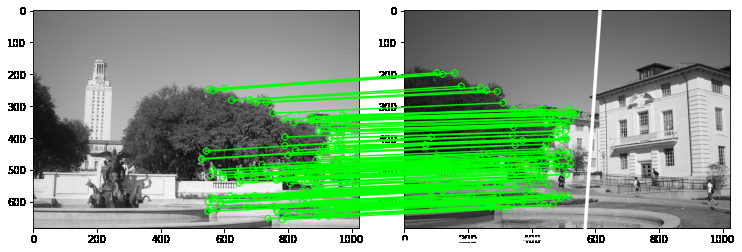

In [22]:
import numpy as np
import cv2

# Load the images in gray scale
rgb_l = cv2.cvtColor(cv2.imread("/content/sample_data/grayleft.png"), cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("/content/sample_data/grayright.png"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

# Detect the SIFT key points and compute the descriptors for the two images
sift = cv2.SIFT_create()
keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Create brute-force matcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Select the good matches using the ratio test
goodMatches = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)

# Apply the homography transformation if we have enough good matches 
MIN_MATCH_COUNT = 10

if len(goodMatches) > MIN_MATCH_COUNT:
    # Get the good key points positions
    sourcePoints = np.float32([ keyPoints1[m.queryIdx].pt for m in goodMatches ]).reshape(-1, 1, 2)
    destinationPoints = np.float32([ keyPoints2[m.trainIdx].pt for m in goodMatches ]).reshape(-1, 1, 2)
    
    # Obtain the homography matrix
    M, mask = cv2.findHomography(sourcePoints, destinationPoints, method=cv2.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    
    # Apply the perspective transformation to the source image corners
    h, w = img1.shape
    corners = np.float32([ [0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0] ]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    
    # Draw a polygon on the second image joining the transformed corners
    img2 = cv2.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(goodMatches), MIN_MATCH_COUNT))
    matchesMask = None

# Draw the matches
drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv2.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)

from google.colab.patches import cv2_imshow
# Display the results
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


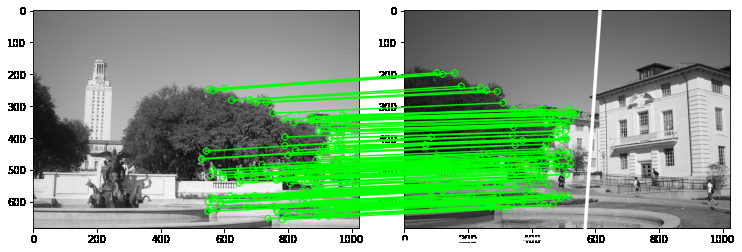

In [ ]:
import numpy as np
import cv2

# Load the images in gray scale
img1 = cv2.imread('/content/sample_data/grayleft.png', 0)
img2 = cv2.imread('/content/sample_data/grayright.png', 0)

# Detect the SIFT key points and compute the descriptors for the two images
sift = cv2.SIFT_create()
keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Create brute-force matcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Select the good matches using the ratio test
goodMatches = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)

# Apply the homography transformation if we have enough good matches 
MIN_MATCH_COUNT = 10

if len(goodMatches) > MIN_MATCH_COUNT:
    # Get the good key points positions
    sourcePoints = np.float32([ keyPoints1[m.queryIdx].pt for m in goodMatches ]).reshape(-1, 1, 2)
    destinationPoints = np.float32([ keyPoints2[m.trainIdx].pt for m in goodMatches ]).reshape(-1, 1, 2)
    
    # Obtain the homography matrix
    M, mask = cv2.findHomography(sourcePoints, destinationPoints, method=cv2.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    
    # Apply the perspective transformation to the source image corners
    h, w = img1.shape
    corners = np.float32([ [0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0] ]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    
    # Draw a polygon on the second image joining the transformed corners
    img2 = cv2.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(goodMatches), MIN_MATCH_COUNT))
    matchesMask = None

# Draw the matches
drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv2.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)

from google.colab.patches import cv2_imshow
# Display the results
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


6. warp Perspective

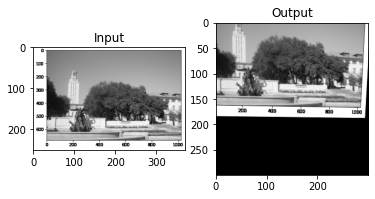

In [7]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/sample_data/grayleft.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

6. Warp image

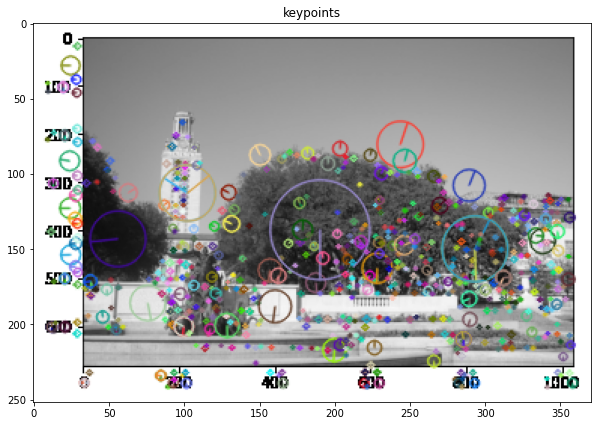

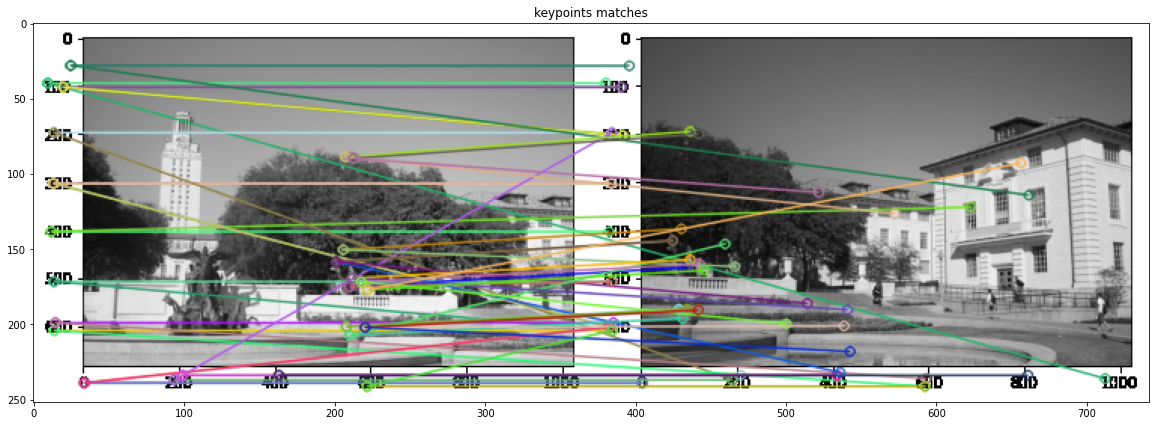

[[ 7.21995049e-01  3.48950606e-02  1.47312425e+02]
 [-1.41369991e-01  8.89492747e-01  2.94603178e+01]
 [-6.58748567e-04 -9.84852790e-05  1.00000000e+00]]


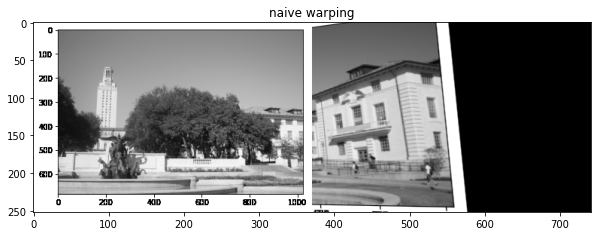

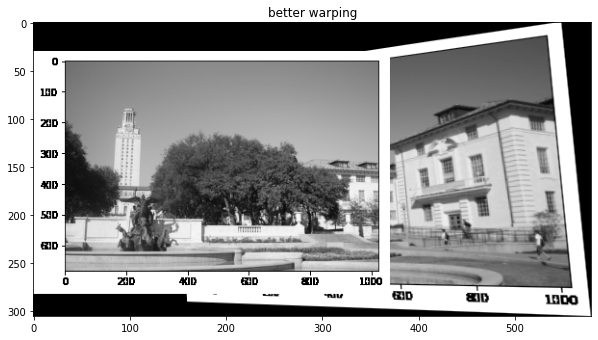

In [9]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)
rgb_l = cv2.cvtColor(cv2.imread("/content/sample_data/grayleft.png"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("/content/sample_data/grayright.png"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[1].distance!=0 and m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()

good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr])
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr])
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print(H)

rgb_r_warped = cv2.warpPerspective(rgb_r, H, (rgb_l.shape[1] + rgb_r.shape[1], rgb_l.shape[0]))
rgb_r_warped[0:rgb_l.shape[0], 0:rgb_l.shape[1]] = rgb_l

plt.figure(figsize=figsize)
plt.imshow(rgb_r_warped)
plt.title("naive warping")
plt.show()

def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H
    from: https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
    '''
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])  # translate

    result = cv2.warpPerspective(img2, Ht@H, (xmax-xmin, ymax-ymin))
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = img1
    return result


result = warpTwoImages(rgb_l, rgb_r, H)

plt.figure(figsize=figsize)
plt.imshow(result)
plt.title("better warping")
plt.show()

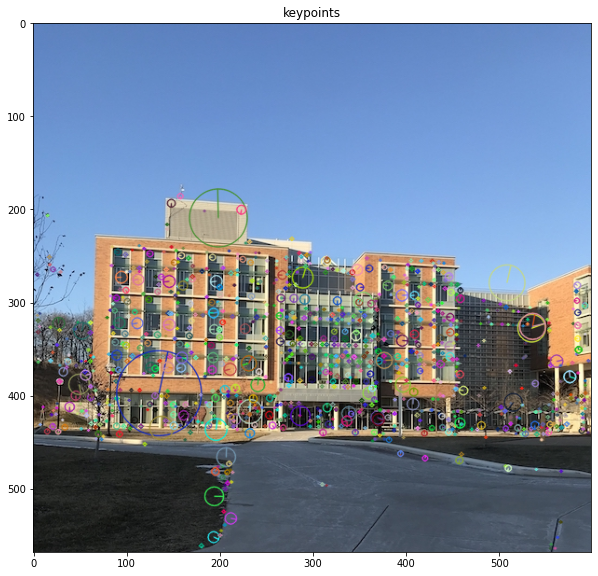

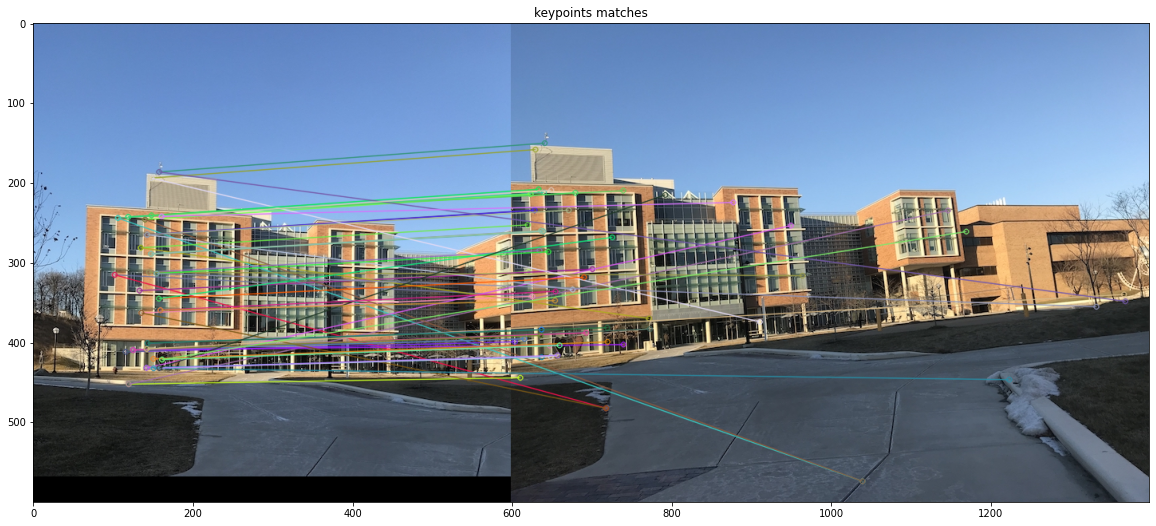

[[ 7.65707543e-01 -2.51261039e-02  1.31034419e+02]
 [-6.53975952e-02  9.71199477e-01  4.63854918e+01]
 [-3.96907147e-04  1.39489432e-04  1.00000000e+00]]


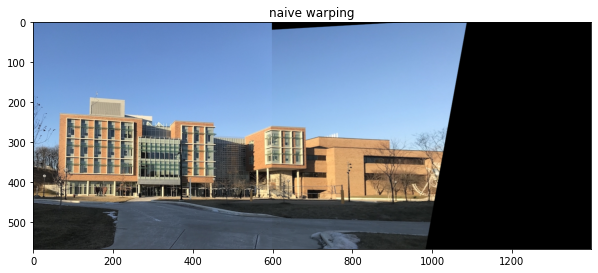

<function matplotlib.pyplot.show>

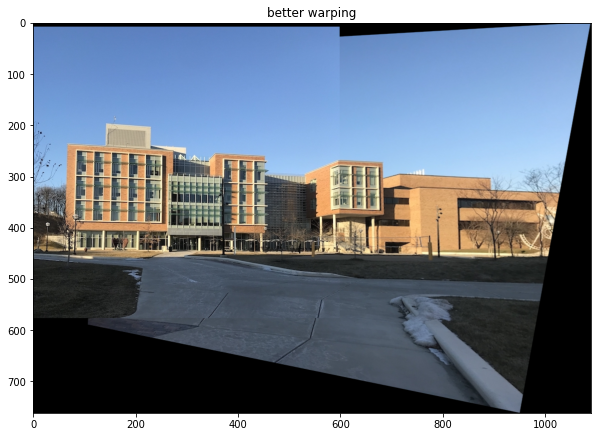

In [13]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)
rgb_l = cv2.cvtColor(cv2.imread("/content/sample_data/bbb_left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("/content/sample_data/bbb_right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[1].distance!=0 and m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()

good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr])
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr])
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print(H)

rgb_r_warped = cv2.warpPerspective(rgb_r, H, (rgb_l.shape[1] + rgb_r.shape[1], rgb_l.shape[0]))
rgb_r_warped[0:rgb_l.shape[0], 0:rgb_l.shape[1]] = rgb_l

plt.figure(figsize=figsize)
plt.imshow(rgb_r_warped)
plt.title("naive warping")
plt.show()

def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H
    from: https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
    '''
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])  # translate

    result = cv2.warpPerspective(img2, Ht@H, (xmax-xmin, ymax-ymin))
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = img1
    return result


result = warpTwoImages(rgb_l, rgb_r, H)

plt.figure(figsize=figsize)
plt.imshow(result)
plt.title("better warping")
plt.show

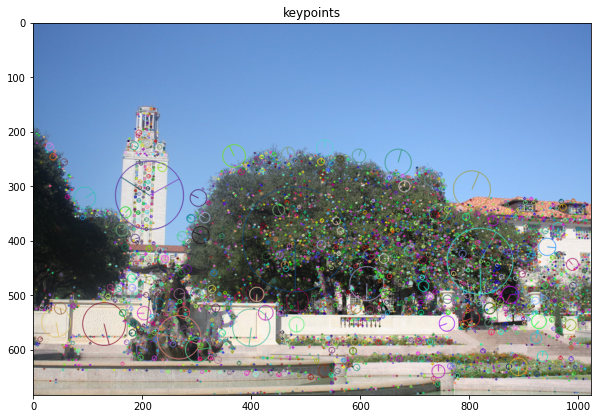

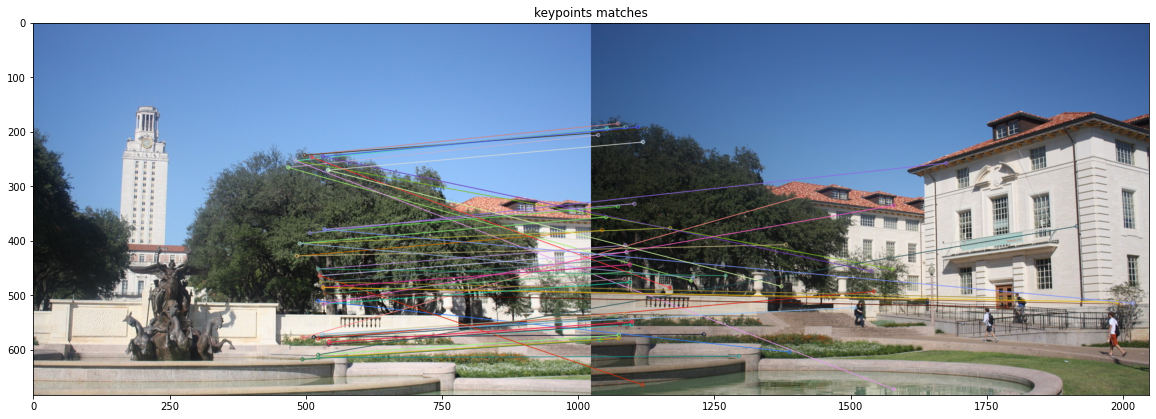

[[ 7.65841375e-01  3.54910796e-02  4.47045588e+02]
 [-1.35147183e-01  9.10962318e-01  7.62311799e+01]
 [-2.10013146e-04 -3.40434121e-05  1.00000000e+00]]


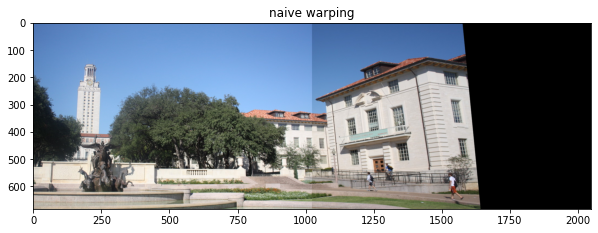

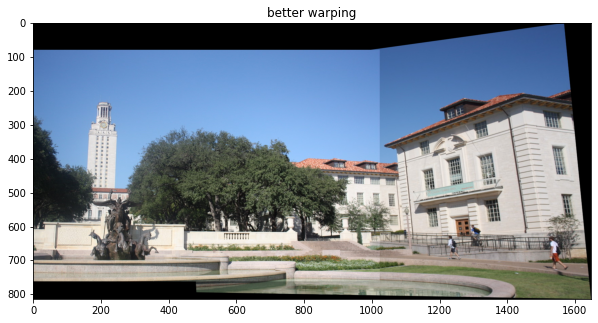

In [14]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)
rgb_l = cv2.cvtColor(cv2.imread("/content/sample_data/uttower_left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("/content/sample_data/uttower_right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[1].distance!=0 and m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()

good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr])
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr])
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print(H)

rgb_r_warped = cv2.warpPerspective(rgb_r, H, (rgb_l.shape[1] + rgb_r.shape[1], rgb_l.shape[0]))
rgb_r_warped[0:rgb_l.shape[0], 0:rgb_l.shape[1]] = rgb_l

plt.figure(figsize=figsize)
plt.imshow(rgb_r_warped)
plt.title("naive warping")
plt.show()

def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H
    from: https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
    '''
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])  # translate

    result = cv2.warpPerspective(img2, Ht@H, (xmax-xmin, ymax-ymin))
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = img1
    return result


result = warpTwoImages(rgb_l, rgb_r, H)

plt.figure(figsize=figsize)
plt.imshow(result)
plt.title("better warping")
plt.show()